Example from "Scientific Computing" by Diane P. O'Leary, SIAM, Philadelphia, 2008.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

In [2]:
pdict = loadmat('class_notes/proj1data.mat')

In [3]:
pdict.keys()

dict_keys(['__header__', '__version__', '__globals__', 'B', 'G', 'A'])

In [4]:
A = pdict['A']
B = pdict['B']
G = pdict['G']

In [5]:
A.shape,B.shape,G.shape

((256, 256), (256, 256), (256, 256))

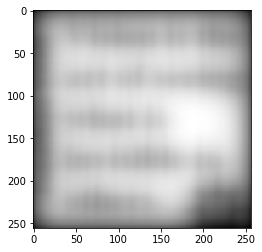

In [6]:
plt.imshow(G,cmap='gray')

In [7]:
#ub,sb,vbt = np.linalg.svd(A)
#ua,sa,vat = np.linalg.svd(B)
ub,sb,vbt = np.linalg.svd(B)
ua,sa,vat = np.linalg.svd(A)

In [8]:
Ghat = ub.T.dot(G).dot(ua)

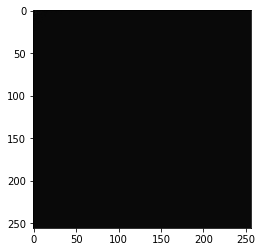

In [9]:
plt.imshow(Ghat,cmap='gray')

In [10]:
S = np.outer(sb,sa)

In [11]:
Fhat = Ghat / S

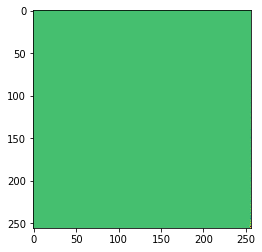

In [12]:
plt.imshow(Fhat)

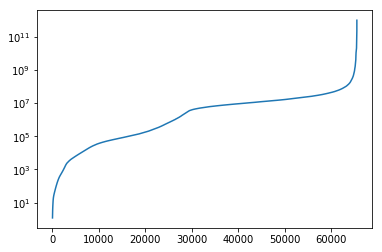

In [32]:
plt.semilogy(np.sort((1/S).flatten()))

In [33]:
# truncated singvalue approach

In [14]:
np.where(S>0.5)

(array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3]),
 array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 0, 1]))

In [15]:
def TSVD1(S,alpha):
    idx = np.where(S>alpha)
    Sinv = np.zeros(S.shape)
    Sinv[idx] = 1/S[idx]
    return Sinv

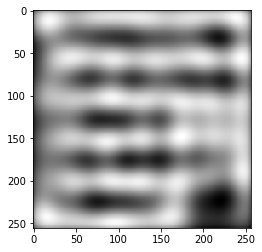

In [16]:
alpha = 0.1
Sinv = TSVD1(S,alpha)
Fhat = Sinv*Ghat
F = vbt.T.dot(Fhat).dot(vat)
plt.imshow(F,cmap='gray')

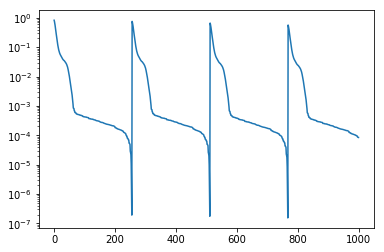

In [19]:
plt.semilogy(S.flatten()[:1000])

In [20]:
perm = np.argsort(S.flatten())

In [21]:
perm

array([65535, 65279, 65023, ...,   256,     1,     0])

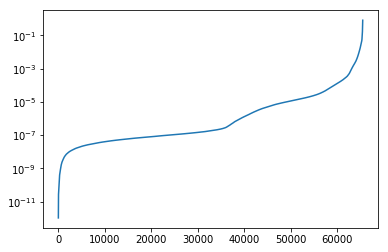

In [22]:
plt.semilogy(S.flatten()[perm])

In [24]:
iperm = np.empty(perm.size,dtype=perm.dtype)
iperm[perm] = np.arange(perm.size)

In [25]:
perm,iperm

(array([65535, 65279, 65023, ...,   256,     1,     0]),
 array([65535, 65534, 65531, ...,    97,     5,     0]))

In [26]:
iperm[perm]

array([    0,     1,     2, ..., 65533, 65534, 65535])

In [27]:
perm[iperm]

array([    0,     1,     2, ..., 65533, 65534, 65535])

In [54]:
def TSVD2(S,k):
    perm = np.argsort(S.flatten())
    iperm = np.empty(perm.size,dtype=perm.dtype)
    iperm[perm] = np.arange(perm.size)
    Sinv = np.zeros(S.size)
    Sinv[-k:] = 1/(S.flatten()[perm[-k:]])
    Sinv = Sinv[iperm]
    return Sinv.reshape(S.shape)

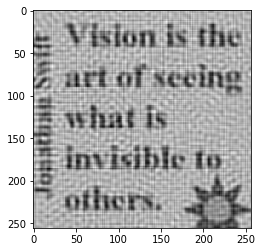

In [56]:
k = 4000
Sinv = TSVD2(S,k)
Fhat = Sinv*Ghat
F = vbt.T.dot(Fhat).dot(vat)
plt.imshow(F,cmap='gray')

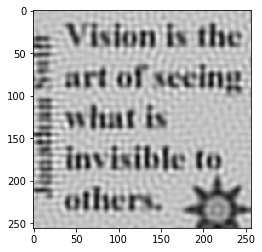

In [59]:
alpha = 0.001
Sinv = TSVD1(S,alpha)
Fhat = Sinv*Ghat
F = vbt.T.dot(Fhat).dot(vat)
plt.imshow(F,cmap='gray')

In [60]:
def TIKHONOV(S,alpha):
    return S /(S*S+alpha*alpha)

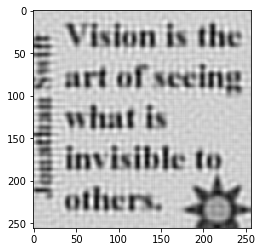

In [63]:
alpha = 0.001
Sinv = TIKHONOV(S,alpha)
Fhat = Sinv*Ghat
F = vbt.T.dot(Fhat).dot(vat)
plt.imshow(F,cmap='gray')